# p20: Second order wave equation in 2-D via FFT

We solve the wave equation in 2-d

$$
u_{tt} = u_{xx}+u_{yy}, \qquad -1 < x,y < 1, \qquad t >0
$$

with $u = 0$ on the boundary and initial condition

$$
u(x,y,0) = e^{-40((x-0.4)^2 + y^2)}, \qquad u_{t}(x,y,0) = 0
$$

In the following code, `i` index runs along $x$-axis and `j` index runs along $y$-axis; see how the `meshgrid` function is used with `indexing='ij'`.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from numpy import meshgrid,cos,pi,round,exp,real,remainder,zeros,fliplr,flipud,array,arange
from numpy.fft import fft, ifft
from matplotlib.pyplot import subplot, figure ,title,axis
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure,subplot,plot,title,axis,xlabel,ylabel
from matplotlib import cm
from scipy.interpolate import RegularGridInterpolator

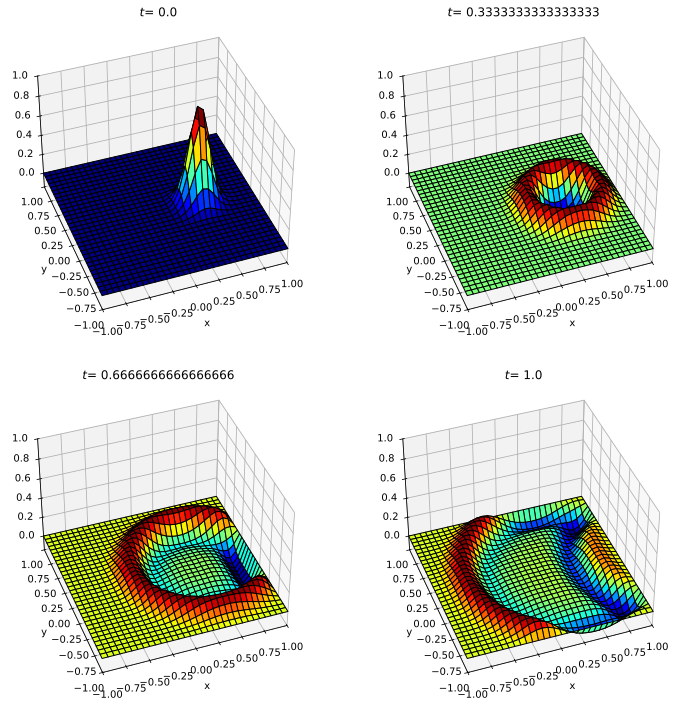

In [4]:
# Grid and inital Data:
N = 24; x = cos(pi*arange(0,N+1)/N); y = x;
t = 0.0; dt = (6.0)/(N**2)
xx, yy = meshgrid(x,y,indexing='ij')
plotgap = int (round( (1.0/3.0) / (dt))); dt = (1.0/3.0)/(plotgap);            
vv = exp(-40*((xx-0.4)**2 + yy**2)); # Solution at n
vvold = vv;                          # Solution at n-1

w1_hat = 1j*zeros(2*N);
w1_hat[0:N] = 1j*arange(0,N)
w1_hat[N+1:] = 1j*arange(-N+1,0)
w2_hat = 1j*zeros(2*N);
w2_hat[0:N+1] = arange(0,N+1)
w2_hat[N+1:] = arange(-N+1,0)

#Time stepping Leapfrog Formula:
fig = figure(figsize=(12,12))
k = 1;
for n in range(0,(3*plotgap)+1):
    t = n*dt;
    if (remainder(n+0.5,plotgap) < 1):
        ax = fig.add_subplot(2,2,k,projection ='3d')
        f = RegularGridInterpolator((x,y),vv,method='cubic');
        xxx = arange(-1.,1.+1./16,1./16);
        X,Y = meshgrid(xxx,xxx,indexing='ij');
        vvv = f((X,Y))
        ax.plot_surface(X,Y,vvv,rstride=1,cstride=1,cmap=cm.jet,edgecolor='black')
        ax.set_zlim3d([-0.15,1])
        ax.set_xlim3d([-1,1])
        ax.set_ylim3d([-1,1])
        ax.view_init(elev=40., azim=250.)
        title("$ t $= " +str(t))
        xlabel("x"); ylabel("y");
        k = k+1;
    
    uxx = zeros((N+1,N+1)); uyy = zeros((N+1,N+1));
    ii = arange(1,N);
    
    for i in range(1,N): # Compute uyy
        v = vv[i,:];          
        V = list(v) + list(flipud(v[ii]));
        U = real(fft(V));
        W1 = real(ifft(w1_hat * U))
        W2 = real(ifft((-w2_hat**2) * U))
        uyy[i,ii] = W2[ii]/(1-x[ii]**2) - (x[ii]*W1[ii])/(1-x[ii]**2)**(3.0/2);
    for j in range(1,N): # Compute uxx
        v = vv[:,j]; 
        V = list(v) + list(flipud(v[ii]));
        U = real(fft(V))
        W1 = real(ifft(w1_hat * U))
        W2 = real(ifft(-(w2_hat**2) * U))
        uxx[ii,j] = W2[ii]/(1-y[ii]**2) - y[ii]*W1[ii]/(1-y[ii]**2)**(3.0/2.0);
    vvnew = 2*vv - vvold + dt**2 *(uxx+uyy) # Solution at n+1
    vvold = vv; vv = vvnew;

## Exercise

Make an animation of the solution.